<a href="https://colab.research.google.com/github/dharnashukla94/Experiments_with_Neon_Framework/blob/master/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#pip install nervananeon

     |████████████████████████████████| 78.5MB 42kB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 327kB 54.8MB/s 
     |████████████████████████████████| 81kB 11.7MB/s 
     |████████████████████████████████| 51kB 9.5MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 491kB 42.7MB/s 
     |████████████████████████████████| 92kB 13.9MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 215kB 59.7MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 235kB 52.1MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 747kB 46.3MB/s 
  Created wheel for configargparse: filename=ConfigArgParse-1.2.3-cp36-none-any.whl size=19328 sha256=4a57122af8e663c2e796

In [0]:
import gzip
import pickle
from PIL import Image
import numpy as np
from numpy import *
from neon.data import MNIST
from neon.backends import gen_backend
from neon.initializers import Gaussian
from neon.layers import Affine
from neon.transforms import Rectlin, Softmax
from neon.models import Model
from neon.layers import GeneralizedCost
from neon.transforms import CrossEntropyMulti
from neon.optimizers import GradientDescentMomentum
from neon.callbacks.callbacks import Callbacks
from neon.transforms import Misclassification
from matplotlib import pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean


In [0]:
# Setting backend

batch_size = 128

be = gen_backend(batch_size=batch_size, backend='cpu')

In [0]:
# downloading Mnist Dataset

mnist = MNIST(path='data/') # Mention the path to store Mnist dataset
train_set = mnist.train_iter
valid_set = mnist.valid_iter

In [0]:
# Initializing the weights

init_norm = Gaussian(loc=0.0, scale=0.01)

In [0]:
# Creating simple architecture with Feed Forward Network

layers = []
layers.append(Affine(nout=10, init=init_norm, activation=Rectlin()))
layers.append(Affine(nout=10, init=init_norm,
                     activation=Softmax()))

In [0]:
# initilazing the model

mlp = Model(layers=layers)

In [0]:
# Declaring cost function

cost = GeneralizedCost(costfunc=CrossEntropyMulti())

In [144]:
# Optimizers
optimizer = GradientDescentMomentum(0.001, momentum_coef=0.9)
callbacks = Callbacks(mlp, eval_set=valid_set)

/usr/local/lib/python3.6/dist-packages/neon/callbacks/callbacks.py:97: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  self.callback_data = h5py.File(self.name, driver='core', backing_store=False)


In [145]:
# GRADED FUNCTION
mlp.fit(train_set, optimizer=optimizer, num_epochs=500, cost=cost, callbacks=callbacks)

Epoch 100 [Train |█                   |   31/468  batches, 0.37 cost, 0.10s]

/usr/local/lib/python3.6/dist-packages/neon/backends/nervanacpu.py:680: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  array_output[numpy_ind.tolist()] = 1


Epoch 100 [Train |████████████████████|  468/468  batches, 0.28 cost, 1.30s]
Epoch 101 [Train |████████████████████|  468/468  batches, 0.27 cost, 1.24s]
Epoch 102 [Train |████████████████████|  468/468  batches, 0.26 cost, 1.22s]
Epoch 103 [Train |████████████████████|  468/468  batches, 0.25 cost, 1.26s]
Epoch 104 [Train |████████████████████|  468/468  batches, 0.25 cost, 1.27s]
Epoch 105 [Train |████████████████████|  468/468  batches, 0.25 cost, 1.23s]
Epoch 106 [Train |████████████████████|  468/468  batches, 0.24 cost, 1.26s]
Epoch 107 [Train |████████████████████|  468/468  batches, 0.24 cost, 1.24s]
Epoch 108 [Train |████████████████████|  468/468  batches, 0.24 cost, 1.27s]
Epoch 109 [Train |████████████████████|  468/468  batches, 0.23 cost, 1.27s]
Epoch 110 [Train |████████████████████|  468/468  batches, 0.23 cost, 1.29s]
Epoch 111 [Train |████████████████████|  468/468  batches, 0.23 cost, 1.31s]
Epoch 112 [Train |████████████████████|  468/468  batches, 0.23 cost, 1.30s]

In [146]:
results = mlp.get_outputs(valid_set)

/usr/local/lib/python3.6/dist-packages/neon/backends/nervanacpu.py:680: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  array_output[numpy_ind.tolist()] = 1


In [147]:
# evaluate the model on test_set using the misclassification metric
error = mlp.eval(valid_set, metric=Misclassification())*100
print('Misclassification error = %.1f%%' % error)

Misclassification error = 5.4%


/usr/local/lib/python3.6/dist-packages/neon/backends/nervanacpu.py:680: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  array_output[numpy_ind.tolist()] = 1


In [0]:
# Unzipping file for inference

with gzip.open('data/mnist.pkl.gz', 'rb') as f:
    train_set, _ = pickle.load(f, encoding = 'ISO-8859-1')

In [0]:
# Inference

(28, 28)


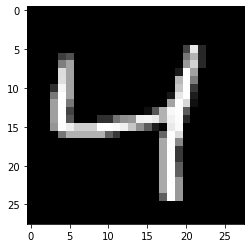

In [68]:
img = []
for i in train_set[0]:
    img.append(i)

plt.imshow(img[2],cmap='gray')
print(img[1].shape)
plt.savefig('data/digit2.jpg', cmap='gray')
plt.show()    

In [0]:
# scale to 28x28 pixels

im = Image.open('data/digit2.jpg')
im = im.resize((28,28),Image.ANTIALIAS)
#im.size
digit = np.asarray(im, dtype=np.float32)[:, :, 0]

# reshape to a single feature vector
digit = digit.reshape(784, 1)

# store digit into a GPU tensor
x_new = be.zeros((28*28, batch_size), dtype=np.float32)
x_new[:, 0] = digit